# GammaBayes Data Classes

One of the more fundamental things within `GammaBayes` is the use of three data classes: `EventData`, `Parameter`, and `ParameterSet`. Here we will go over `EventData`, it's inputs, outputs and useful methods and behaviours.

# `EventData`

As in the name, `EventData`, stores data from events. The idea for many of the classes within this package is that you don't __need__ to use them, and can use alternate inputs if you so wish within reason. This class is designed to handle event data for gamma ray event observations, including energy measurements, galactic longitude (glon), and galactic latitude (glat). 

It supports initializing data either from separate arrays of energy, glon, and glat, or a combined data array. Additional data regarding the observation can also be provided.

### Parameters (inputs):

    - energy (array-like, optional):  Array of energy measurements for the events.
    
    - glon (array-like, optional):  Array of galactic longitude coordinates for the events.
    
    - glat (array-like, optional):  Array of galactic latitude coordinates for the events.
    
    - data (array-like, optional):  Combined array of the format [energy, glon, glat, ...] for the events.
    
    - event_times (array-like, optional):  Array of observation times for the events.
    
    - pointing_dirs (array-like, optional):  Array of pointing directions for the telescope during observations (in galactic coordinates).
    
    - obs_start_time, obs_end_time (scalar, optional):  Start and end times of the observation period.
    
    - hemisphere (str, optional):  Hemisphere in which the observation was made.
    
    - zenith_angle (int, optional):  Zenith angle of the observation.
    
    - obs_id (str, optional):  Identifier for the observation, defaults to 'NoID'.
    
    - energy_axis, glongitude_axis, glatitude_axis (array-like, optional):  Axes definitions for binning the data. Defaults to np.nan, indicating automatic binning.

### Attributes:
    - energy, glon, glat: Arrays containing the energy, galactic longitude, and latitude of events.
    
    - data: Structured array containing the event data.
    
    - event_times: Array of event times.
    
    - pointing_dirs: Array of pointing directions (in galactic coordinates).
    
    - obs_id: Observation ID.
    
    - hemisphere: Hemisphere of observation.
    
    - zenith_angle: Zenith angle of observation.
    
    - obs_start_time, obs_end_time: Observation start and end times.
    
    - energy_axis, glongitude_axis, glatitude_axis: Axes for data binning.

The constructor handles missing data by assigning NaNs. It defines axes and bins for energy and angular coordinates, falling back to default bins if not provided. Observation metadata such as ID, hemisphere, zenith angle, and start/end times are stored, along with private attributes for source and likelihood ID.

The key values they are required at the time of writing are the energy, galactic longitude and galactic latitude for use within the astrophysical priors.

## Test Case/Methods/Behaviours

The below block of code will be covered in later tutorials, all we need to know for now is that it generates an instance of the `EventData` class.

In [1]:
import random
random.seed(24) # Fixing the seed so the results are always the same


from gammabayes import EventData
from gammabayes.priors import HESSCatalogueSources_Prior
import numpy as np
from gammabayes.likelihoods.irfs import IRF_LogLikelihood
from gammabayes.utils.config_utils import (
    read_config_file, 
    create_true_axes_from_config, 
    create_recon_axes_from_config, 
)
from matplotlib import pyplot as plt


config_file_path = 'ConfigFiles/DataClasses_config.yaml'
config_dict = read_config_file(config_file_path)


energy_true_axis,  longitudeaxistrue, latitudeaxistrue       = create_true_axes_from_config(config_dict)
energy_recon_axis, longitudeaxis,     latitudeaxis           = create_recon_axes_from_config(config_dict)


irf_loglike = IRF_LogLikelihood(
    axes   =   [energy_recon_axis,    longitudeaxis,     latitudeaxis], 
    dependent_axes =   [energy_true_axis,     longitudeaxistrue, latitudeaxistrue],
    prod_vers='5')


hess_sources_prior = HESSCatalogueSources_Prior(
    energy_axis=energy_true_axis, 
    longitudeaxis=longitudeaxistrue, 
    latitudeaxis=latitudeaxistrue,
    irf=irf_loglike)

event_data = hess_sources_prior.sample(1e4)

print(event_data)

/Users/lpin0002/anaconda3/envs/testofwest/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


file path: ConfigFiles/DataClasses_config.yaml
0.2 90.0 100 0.2 -3.0 3.0 -3.0 3.0
0.2 90.0 50 0.4 -3.0 3.0 -3.0 3.0

Path to irf fits file: /Users/lpin0002/anaconda3/envs/testofwest/lib/python3.12/site-packages/gammabayes/utils/../package_data/irf_fits_files/prod5/CTA-Performance-prod5-v0.1-South-20deg.FITS/Prod5-South-20deg-AverageAz-14MSTs37SSTs.180000s-v0.1.fits.gz

Number of input dimensions 3


/Users/lpin0002/anaconda3/envs/testofwest/lib/python3.12/site-packages/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)



Event Data ID: NoID
:::::::::::::::::::::::::::::::
Nevents                |   10000
Hemisphere             |   None
Zenith Angle           |   None
-------------------------------
Obs Start Time         |   None
Obs End Time           |   None
Total Obs Time         |   NA
- - - - - - - - - - - - - - - - 
Min Event Time         |   nan
Max Event Time         |   nan
-------------------------------
Num Angular Bins       |   32
Num Energy Bins        |   267
- - - - - - - - - - - - - - - - 
Min Energy             |   0.200 TeV
Max Energy             |   68.249 TeV
-------------------------------
Source IDs             |   ['HESS Catalogue Sources Prior']
Likelihood ID          |   nan
True Values?           |   True



/Users/lpin0002/anaconda3/envs/testofwest/lib/python3.12/site-packages/gammabayes/priors/core/discrete_logprior.py:64: UserWarning: No function to calculate on mesh efficiently given
  warnings.warn('No function to calculate on mesh efficiently given')


### `EventData.peek()`

So `event_data` stores event data from sources within the HESS catalogue near the Galactic Centre. One particular method associated with `EventData` that will be handy is `peek`.

It generates a visualization of the data distributions for energy and angular coordinates. It expects a non-zero number of events. Any arguments or keywords outside figsize and colorscale are passed into 'plt.subplots'.

Args:
    figsize (tuple, optional): Size of the figure.
    
    colorscale (str, optional): Color scale to use for the histogram. Defaults to 'log' for logarithmic color scaling.

Returns:
    matplotlib.figure.Figure, matplotlib.axes.Axes: The figure and axes objects of the plot.

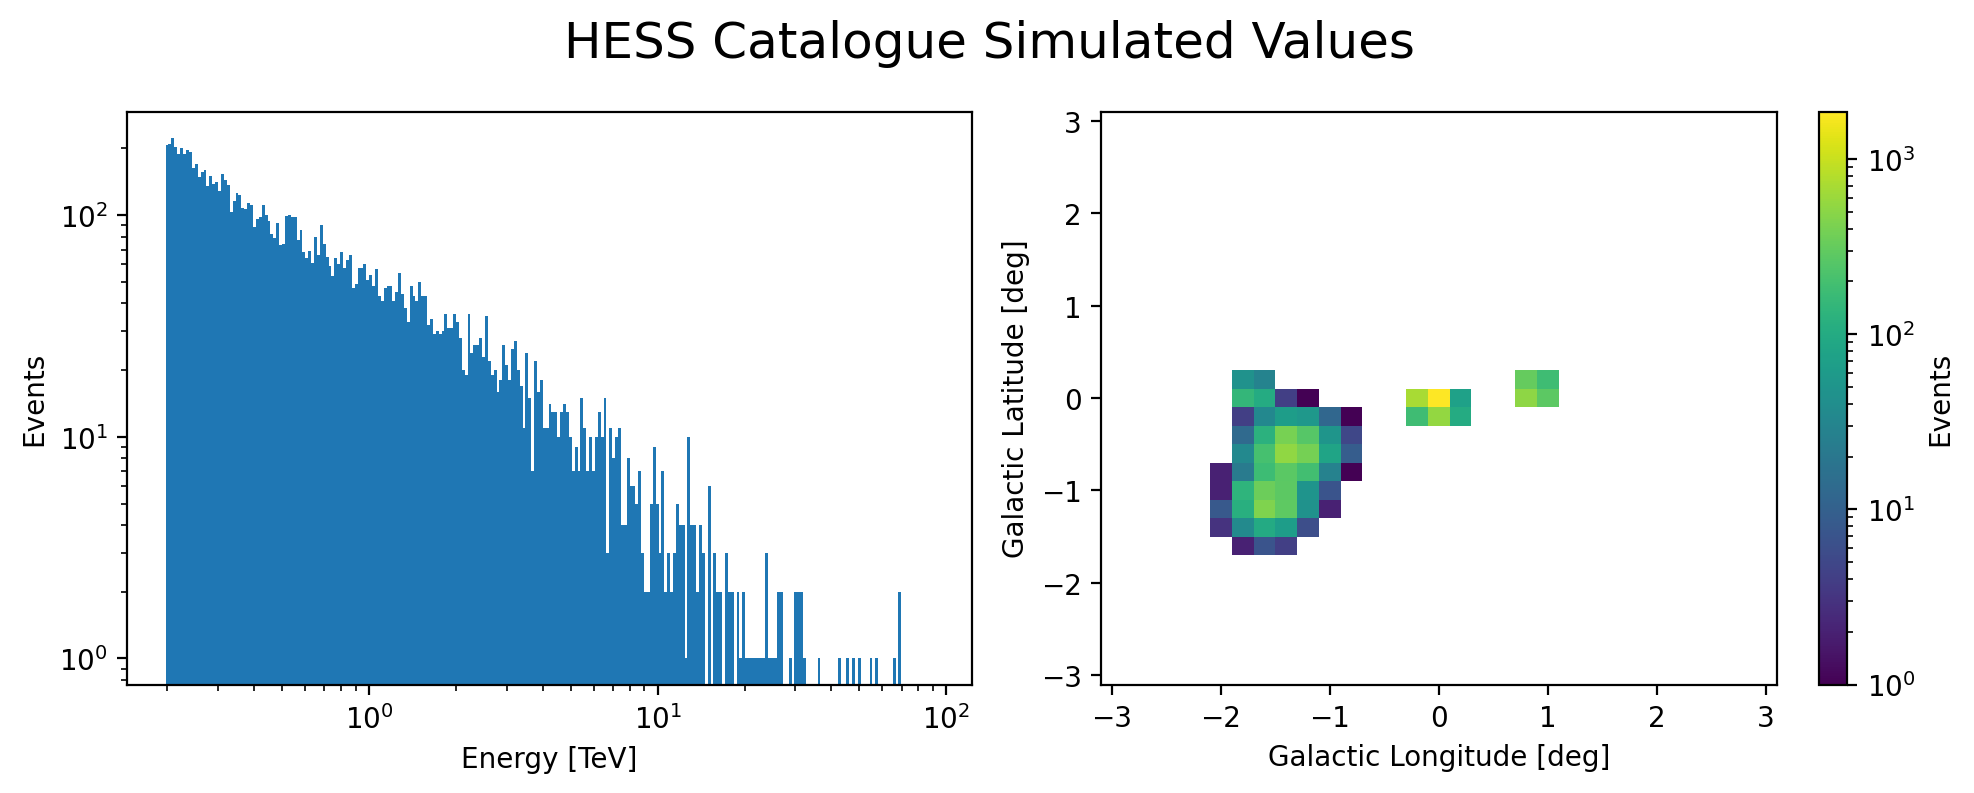

In [2]:
event_data.peek(dpi=200)
plt.suptitle("HESS Catalogue Simulated Values", size=18)
plt.tight_layout()
plt.show()

### Extracting data

Again, this class is meant to be as simple as possible to use. So if you want to get the energy, galatic longitude or galactic latitude values out of the class you write,

In [3]:
event_data.energy # Energy

array([0.83518292, 1.48622537, 0.24611558, ..., 0.89498956, 0.95907891,
       0.2       ])

In [4]:
event_data.glon # Galactic Longitude

array([-1.6,  1. , -1.2, ...,  0. , -1.4, -1.4])

In [5]:
event_data.glat # Galactic Latitude

array([-0.2,  0. , -0.8, ...,  0. , -0.4, -0.4])

The `EventData` class can also essentially be thought of as a fancy wrapper for the numpy array containing these values.



In [6]:
event_data.data

array([[ 0.83518292, -1.6       , -0.2       ],
       [ 1.48622537,  1.        ,  0.        ],
       [ 0.24611558, -1.2       , -0.8       ],
       ...,
       [ 0.89498956,  0.        ,  0.        ],
       [ 0.95907891, -1.4       , -0.4       ],
       [ 0.2       , -1.4       , -0.4       ]])

In [7]:
np.asarray([event_data.energy, event_data.glon, event_data.glat]).T # Same as the previous cell

array([[ 0.83518292, -1.6       , -0.2       ],
       [ 1.48622537,  1.        ,  0.        ],
       [ 0.24611558, -1.2       , -0.8       ],
       ...,
       [ 0.89498956,  0.        ,  0.        ],
       [ 0.95907891, -1.4       , -0.4       ],
       [ 0.2       , -1.4       , -0.4       ]])

Where each row of this matrix/array corresponds to the energy, galactic longitude and galactic latitude values for a single event.

In [8]:
event_data.data[0]

array([ 0.83518292, -1.6       , -0.2       ])

All general behaviours of the class closely mimic those of this array, but we will cover these more later.

### `EventData.Nevents`

This ones simple, it is equivalent to calling 

In [9]:
len(event_data.data)

10000

In [10]:
event_data.Nevents

10000

Just makes it a little more clear what you're doing within the code.

### Combining EventData instances

This is more of a behaviour than a method, but it's handy. If you need to combine two sets of `EventData` instances, all you have to do is `instance1 + instance2`. e.g. First we simulate some more events

In [11]:
from gammabayes.dark_matter import Z2_ScalarSinglet
from gammabayes.dark_matter.density_profiles import Einasto_Profile
from gammabayes.priors import TwoCompPrior
dark_matter_prior = TwoCompPrior(name='Z2 Scalar Singlet dark matter',
                        spectral_class = Z2_ScalarSinglet, 
                        spectral_class_kwds={'ratios':True},
                        spatial_class = Einasto_Profile,
                        irf_loglike=irf_loglike, 
                        axes=(energy_true_axis, 
                              longitudeaxistrue, 
                              latitudeaxistrue,), 
                        axes_names=['energy', 'lon', 'lat'],
                        default_spectral_parameters={
                            'mass':config_dict['dark_matter_mass'], # 1.0 TeV
                            'lahS':0.1}, )

event_data2 = dark_matter_prior.sample(1e3) # Note: Not a realistic amount for the amount of data

print(event_data2)


Event Data ID: NoID
:::::::::::::::::::::::::::::::
Nevents                |   1000
Hemisphere             |   None
Zenith Angle           |   None
-------------------------------
Obs Start Time         |   None
Obs End Time           |   None
Total Obs Time         |   NA
- - - - - - - - - - - - - - - - 
Min Event Time         |   nan
Max Event Time         |   nan
-------------------------------
Num Angular Bins       |   32
Num Energy Bins        |   267
- - - - - - - - - - - - - - - - 
Min Energy             |   0.200 TeV
Max Energy             |   0.981 TeV
-------------------------------
Source IDs             |   ['Z2 Scalar Singlet dark matter']
Likelihood ID          |   nan
True Values?           |   True



Have a peek to show that they are in fact different.

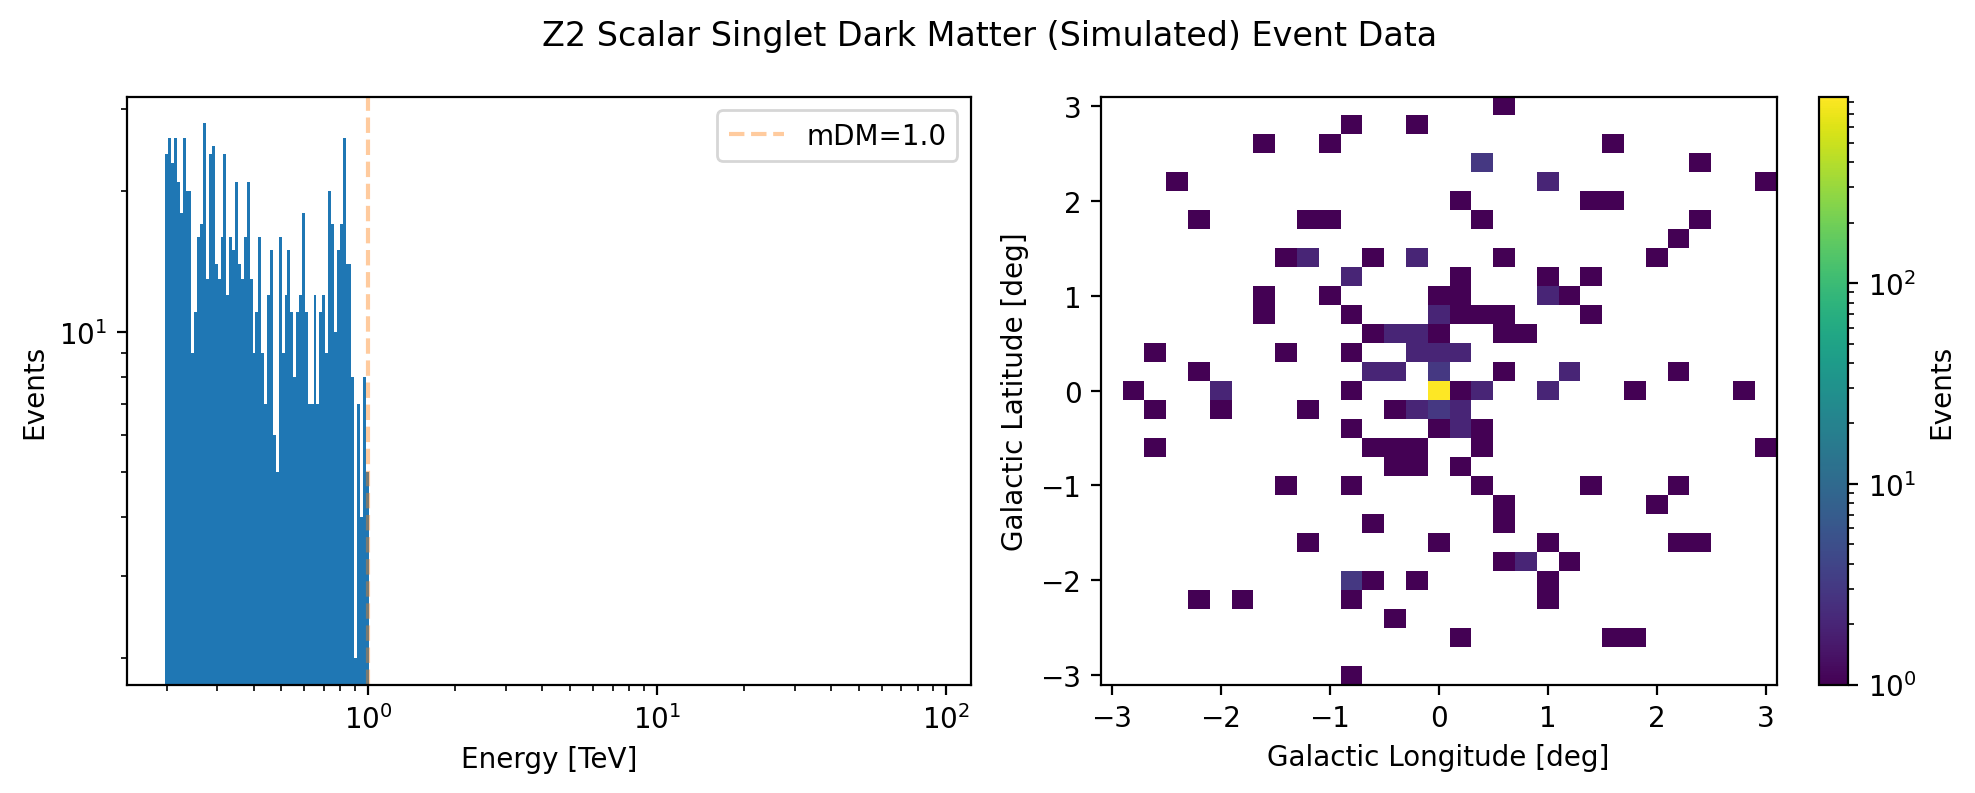

In [12]:
fig, axs = event_data2.peek(dpi=200)
plt.suptitle("Z2 Scalar Singlet Dark Matter (Simulated) Event Data")
axs[0].axvline(config_dict['dark_matter_mass'], 
               ls='--', alpha=0.4, c='tab:orange', 
               label=f'mDM={config_dict['dark_matter_mass']}')
axs[0].legend()
plt.tight_layout()
plt.show()

Then we can add the two and have anothe peek at the combined data.

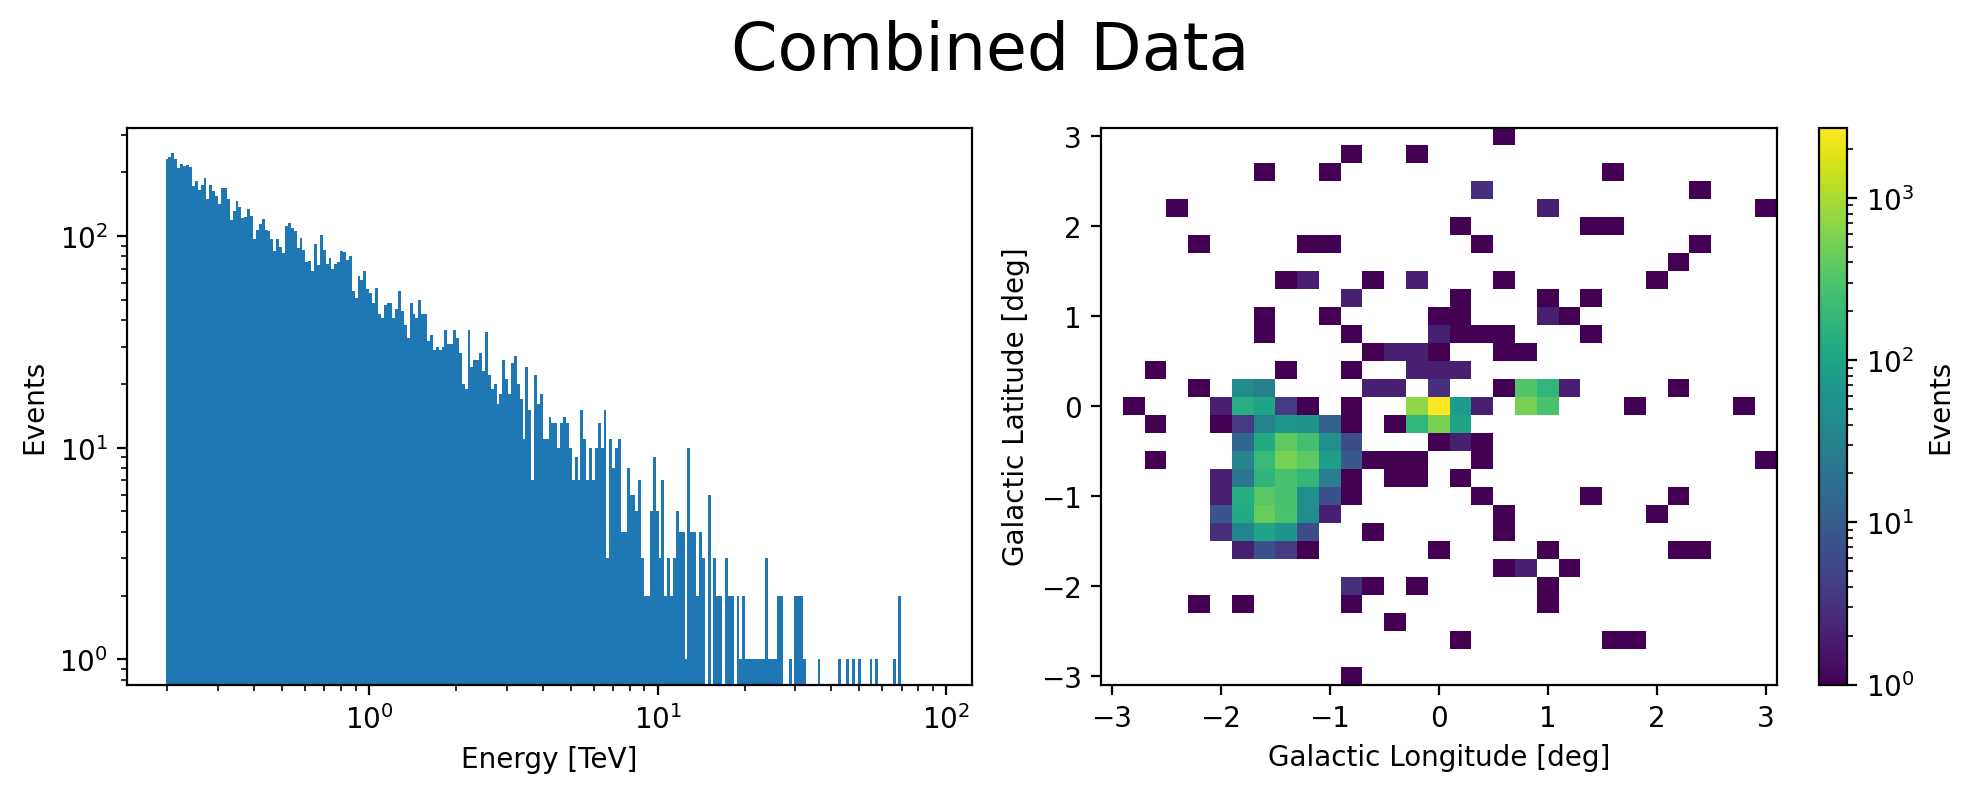

In [13]:
combined_data = event_data + event_data2

combined_data.peek(dpi=200)
plt.suptitle("Combined Data", size=24)
plt.tight_layout()
plt.show()

### `EventData.save` and `EventData.load`

Now this would be a bit useless if we couldn't save the data efficiently. For `EventData` and most other classes instances were custom functions don't need to be stored, we store our data in `h5` files (otherwise we just `pickle` them). However, an effort has been made that every class has a save and load method so that all one has to provide is a file name. 

Additionally, one does not have to provide the extension name when saving and loading, it will be tacked on in case it isn't there.

In [14]:
combined_data.save("example_combined_data.h5")

In [15]:
loaded_combined_data = EventData.load("example_combined_data.h5")

Then we peek again to check we loaded the same data we saved.

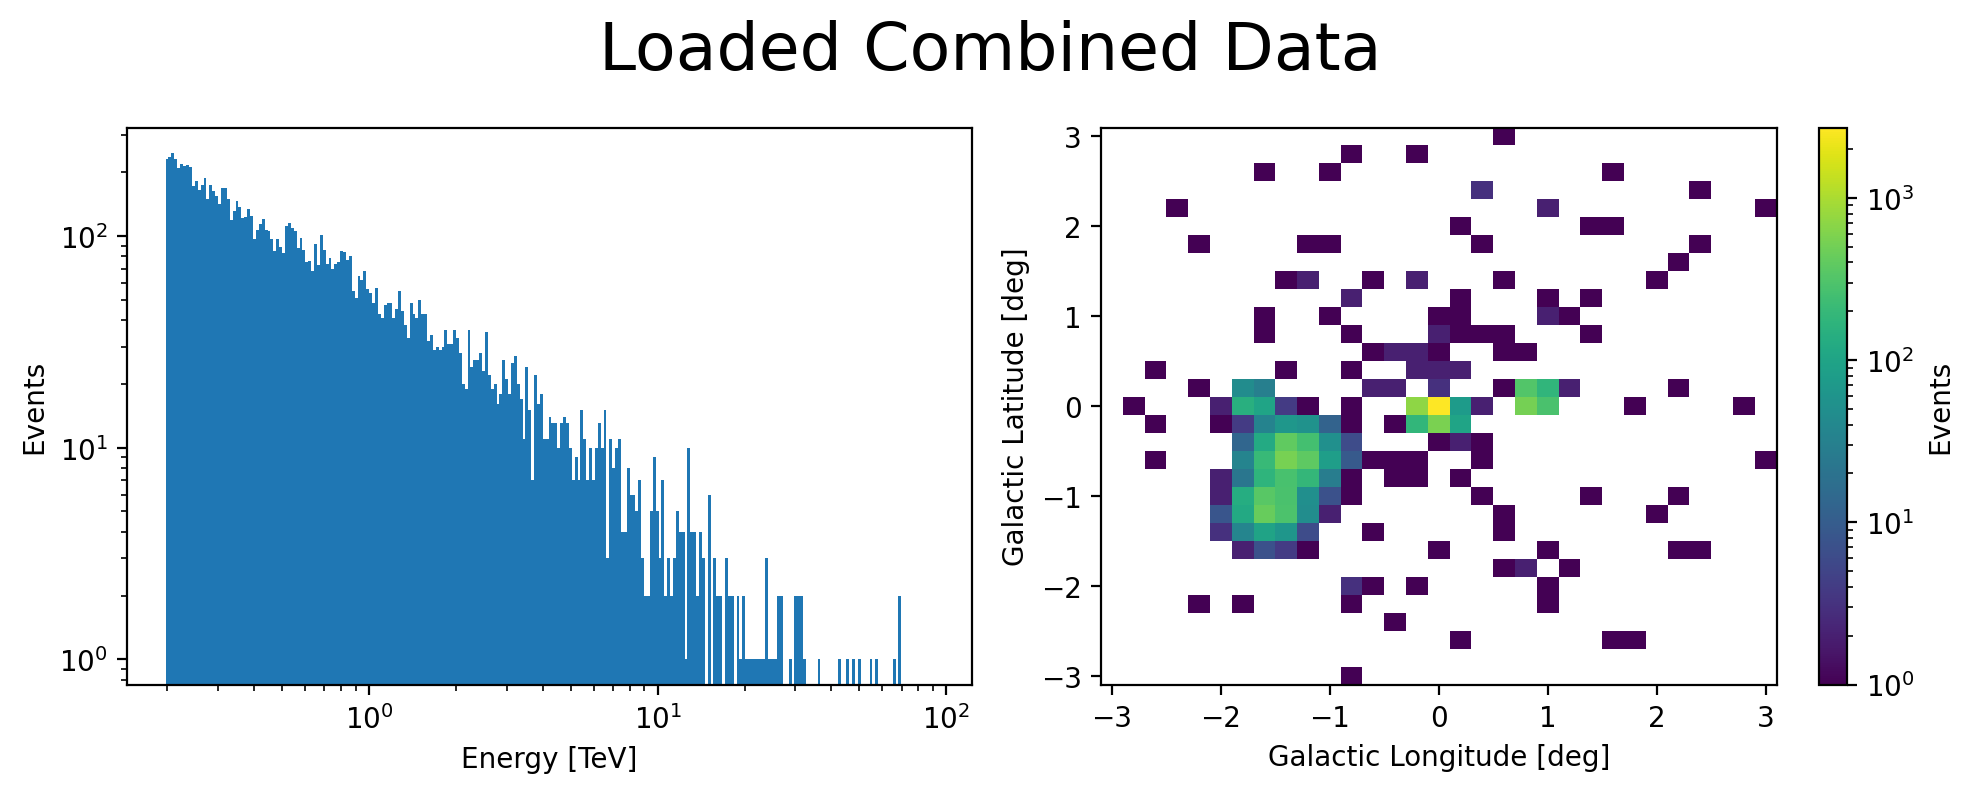

In [16]:
loaded_combined_data.peek(dpi=200)
plt.suptitle("Loaded Combined Data", size=24)
plt.tight_layout()
plt.show()

We have currently defined it such that a file __cannot__ be overwritten if it has the same file name. In an update very soon the behaviour will be that the file name will be used with a time data stamp on the end so that the script continues to run rather than raise an error when you try. For now we will just delete the file so that if the script it re-run it won't raise an error.

In [17]:
import os

os.system("rm -rf example_combined_data.h5")

0

### `EventData.extract_event_axes`

As the code stands, all event values whether "True" or "Reconstructed" are discrete/binned. It is helpful to know what the bins are or the possible discrete values for events. We currently require these to be stored in the priors/likelihoods, and when they generate `EventData` instances such as above, these axes are automatically included and can be accessed via the `extract_event_axes` method in the order of `energy`, `glon` then `glat`.

In [18]:
combined_data.extract_event_axes()

(array([ 0.2       ,  0.20466431,  0.2094374 ,  0.21432181,  0.21932013,
         0.22443501,  0.22966919,  0.23502543,  0.24050659,  0.24611558,
         0.25185537,  0.25772903,  0.26373968,  0.2698905 ,  0.27618476,
         0.28262582,  0.28921709,  0.29596209,  0.30286438,  0.30992765,
         0.31715565,  0.32455221,  0.33212127,  0.33986686,  0.34779308,
         0.35590416,  0.3642044 ,  0.37269821,  0.38139011,  0.39028472,
         0.39938677,  0.40870109,  0.41823264,  0.42798647,  0.43796779,
         0.44818188,  0.45863417,  0.46933024,  0.48027575,  0.49147653,
         0.50293852,  0.51466783,  0.52667069,  0.53895347,  0.5515227 ,
         0.56438507,  0.57754741,  0.59101671,  0.60480014,  0.61890502,
         0.63333885,  0.6481093 ,  0.66322422,  0.67869164,  0.69451978,
         0.71071707,  0.72729209,  0.74425368,  0.76161083,  0.77937278,
         0.79754897,  0.81614905,  0.83518292,  0.85466068,  0.8745927 ,
         0.89498956,  0.91586211,  0.93722144,  0.9

### `EventData.append`

As previously said, this class is effectively a nice wrapper for a matrix containing the values of gamma ray events. In this line of thinking, we can replicate the `numpy.array` behaviour of appending more data, or equivalently the `extend` behaviour of python lists.

i.e. If you have a matrix of values that you wish to add to the `EventData` class you can use the `append` method.

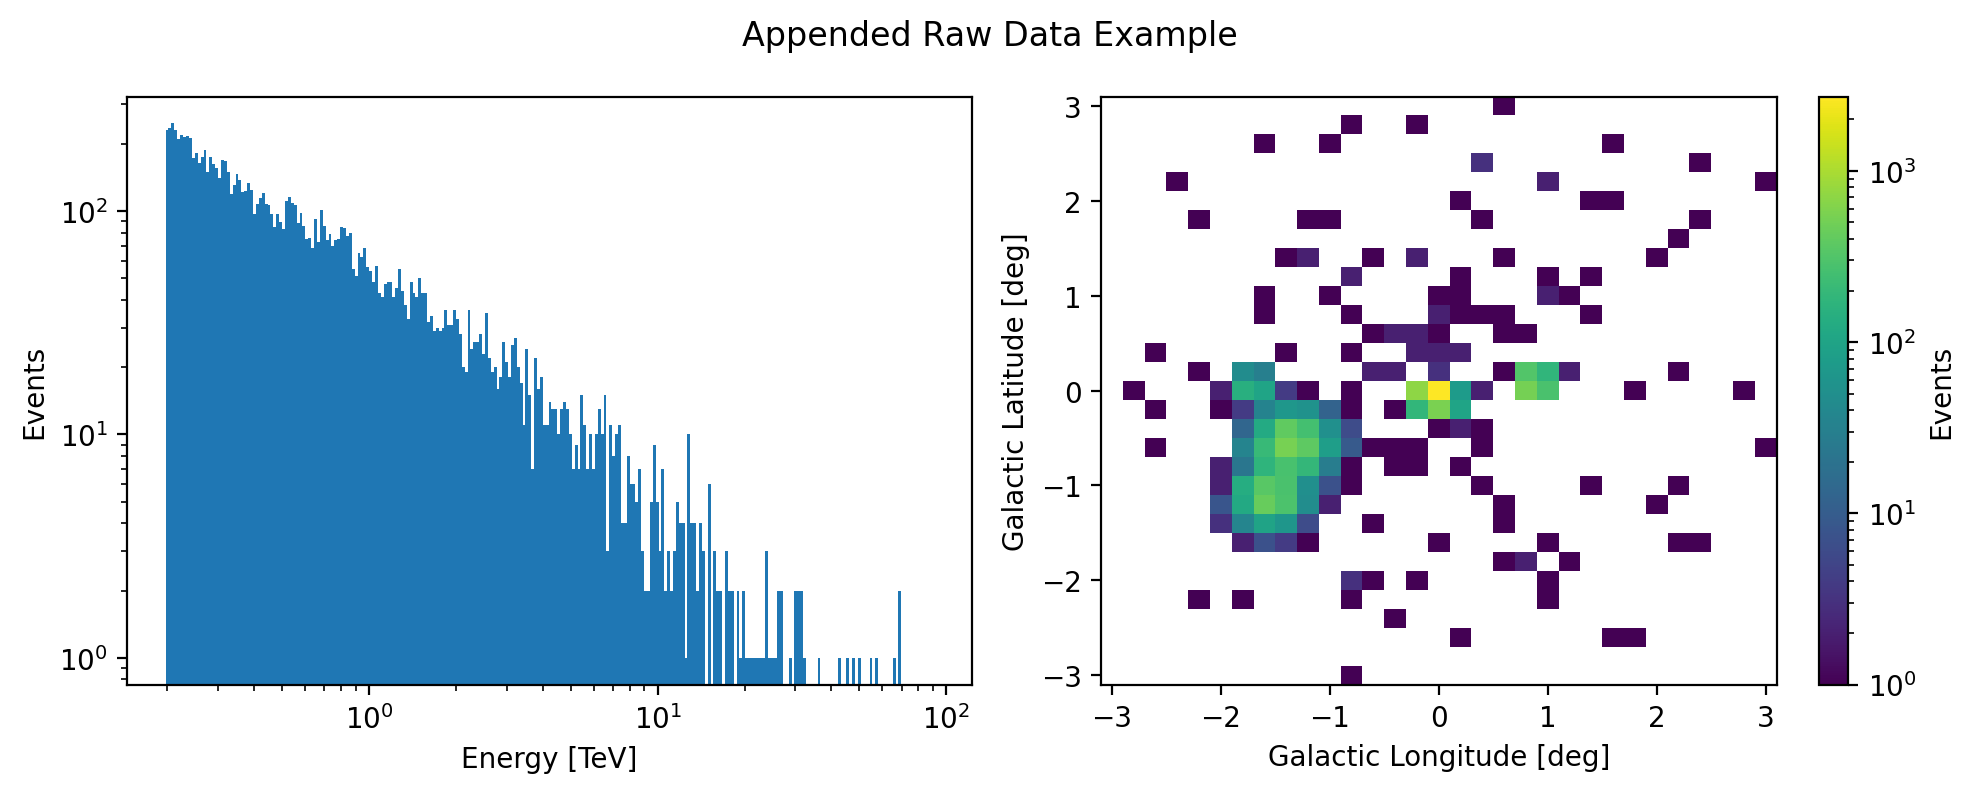

In [19]:
event_data.append(event_data2.data)

event_data.peek(dpi=200)
plt.suptitle("Appended Raw Data Example")
plt.tight_layout()
plt.show()

We note this also works for event data instances as well.

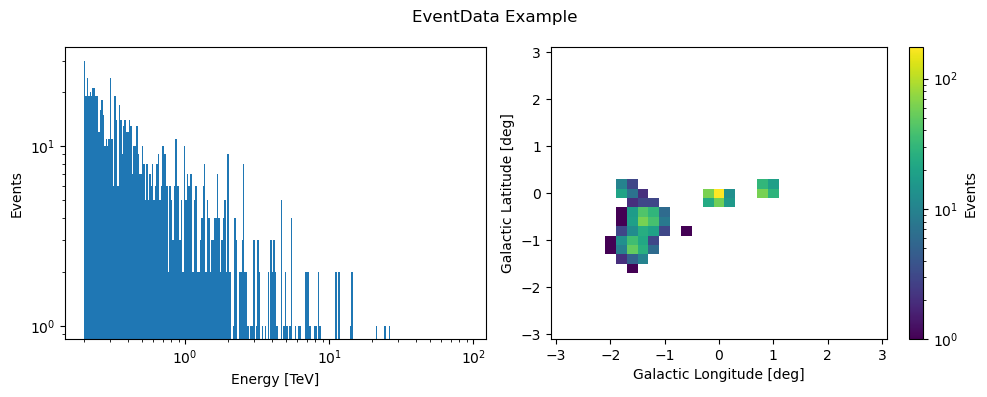

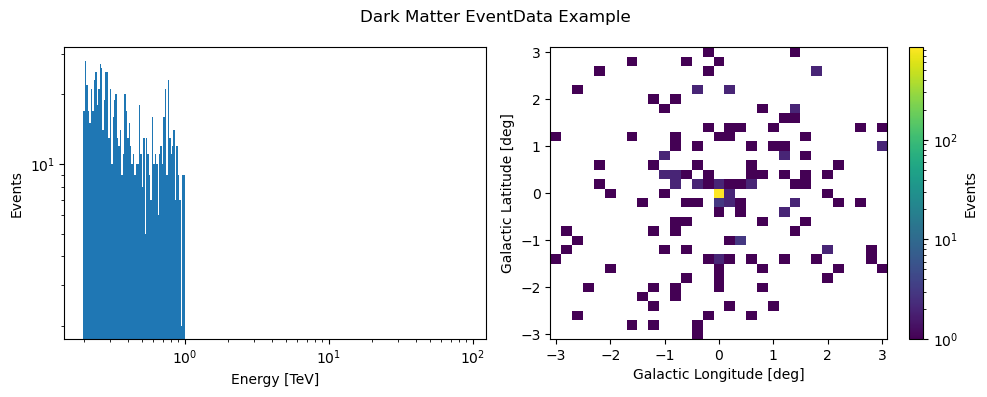

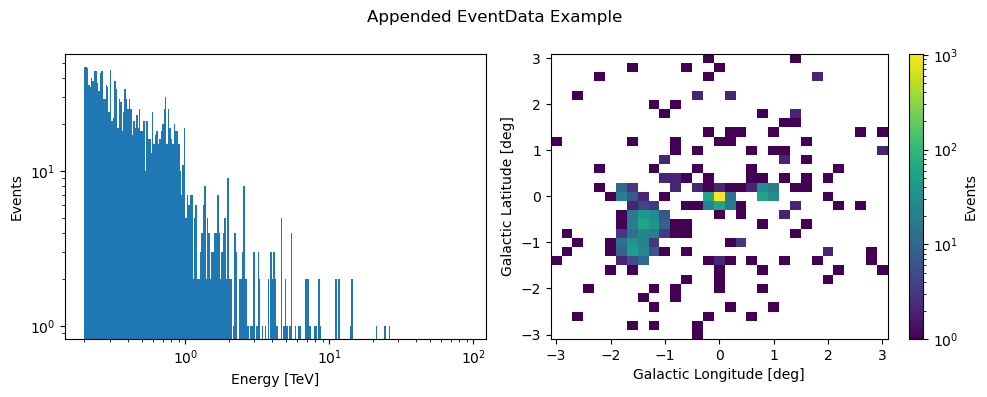

In [20]:
event_data = hess_sources_prior.sample(1e3)
event_data.peek()
plt.suptitle("EventData Example")
plt.tight_layout()
plt.show()

event_data2 = dark_matter_prior.sample(1e3)
event_data2.peek()
plt.suptitle("Dark Matter EventData Example")
plt.tight_layout()
plt.show()


event_data.append(event_data2)
event_data.peek()
plt.suptitle("Appended EventData Example")
plt.tight_layout()
plt.show()

We note, that as the code is not quite fully developed, we do not have event ID's, an identification for every event, to check whether a collection of data has duplicates of the same event. So if you call this method multiple times, you will be analysing/looking at duplicate events.

### `EventData.create_batches`

Due to the large computational costs of the code when analysing large amounts of events, e.g. 10^8, it is quite useful to be able to split up the data and analyse each set independently, then combine the results at the end of the analysis. i.e. Embarassingly parallel processing. 

Because this is done so often, `EventData` has the `create_batches` method which splits the data into the specified number of 'batches' with each batch also being an instance of the `EventData` class. 

If the number of events does not allow it to be split evenly into the specified number of batches ( e.g. 10 events 3 batches) any 'left over' events will be allocated to the final batch as shown below

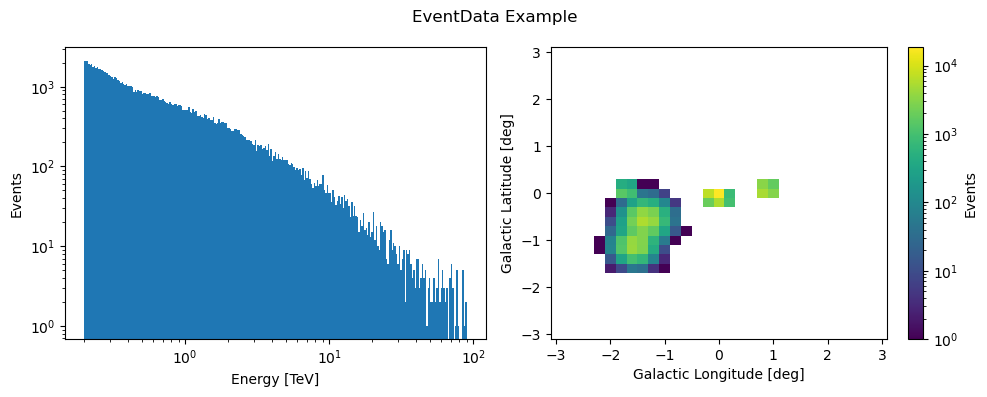

In [21]:
event_data = hess_sources_prior.sample(1e5)
event_data.peek()
plt.suptitle("EventData Example")
plt.tight_layout()
plt.show()

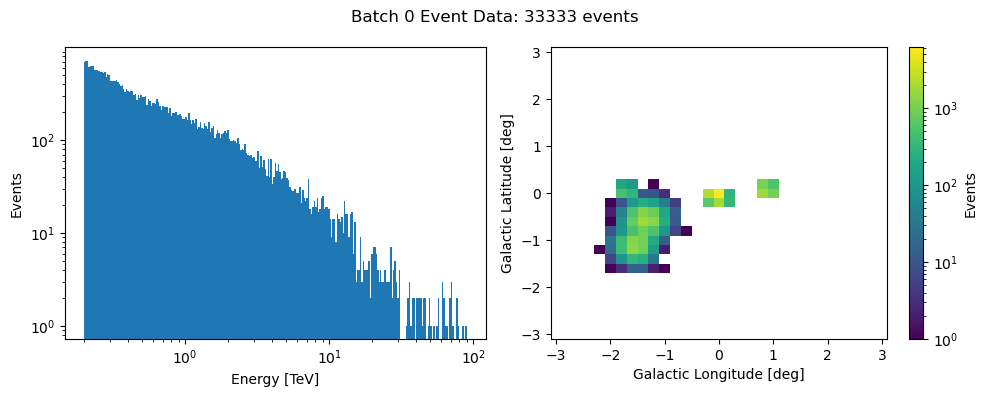

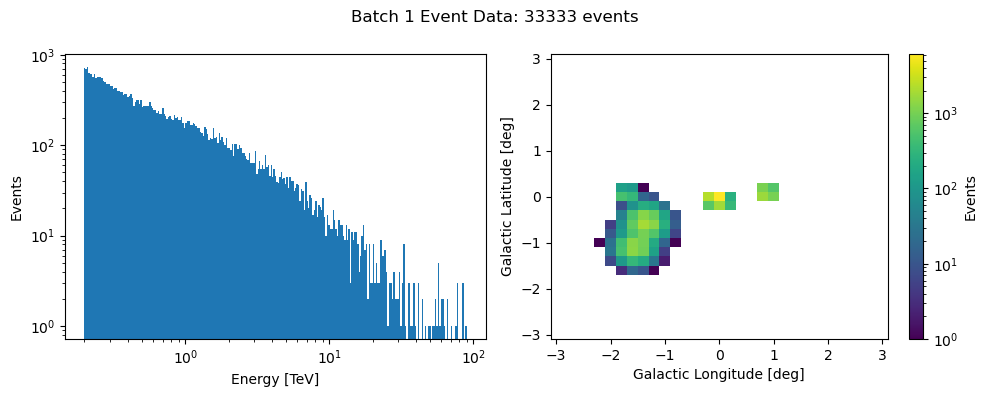

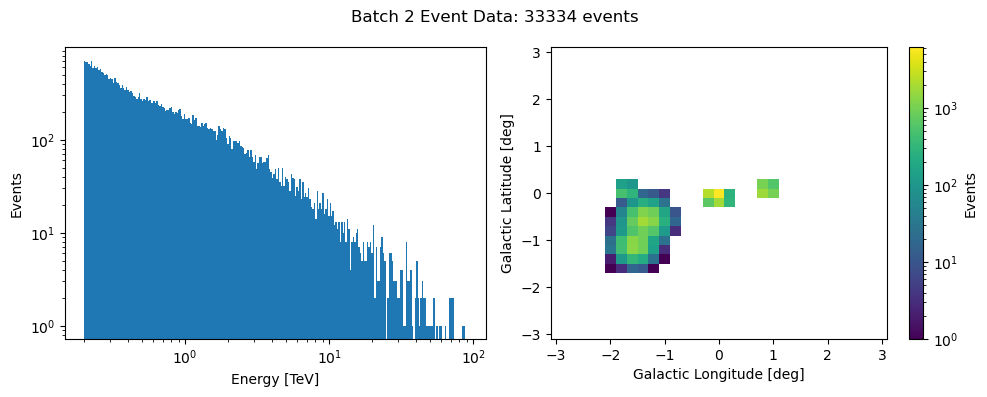

In [22]:
event_data_batches = event_data.create_batches(num_batches=3)

for batch_idx, batch_of_event_data in enumerate(event_data_batches):
    batch_of_event_data.peek()
    plt.suptitle(f"Batch {batch_idx} Event Data: {batch_of_event_data.Nevents} events")
    plt.tight_layout()
    plt.show()

### `EventData.full_data`

One _expected_ useful behaviour is to extract a list of event data tuples that contain all the array data for each event, including the pointing directions and event times. This can be done with the `full_data` method, where the 4th and 5th entries of each tuple/item of the list.

In [23]:
# Pointing direction and event times are currently nan as they were unspecified
event_data.full_data[:10]

[(0.5266706886521446, -1.4, -1.2, array([nan, nan]), nan),
 (0.2959620872256417,
  -1.5999999999999999,
  -0.5999999999999996,
  array([nan, nan]),
  nan),
 (0.25185537428171906,
  -1.7999999999999998,
  -0.7999999999999998,
  array([nan, nan]),
  nan),
 (0.7107170656715822, -1.7999999999999998, -1.0, array([nan, nan]), nan),
 (1.3244148954283388, 0.8000000000000003, 0.0, array([nan, nan]), nan),
 (0.28262582043297246, -1.4, -1.2, array([nan, nan]), nan),
 (0.8351829171124139, 0.0, 0.0, array([nan, nan]), nan),
 (0.30992765254345206, -1.5999999999999999, -1.2, array([nan, nan]), nan),
 (0.2405065880365814, -1.2, -1.0, array([nan, nan]), nan),
 (0.3171556477729239, 0.8000000000000003, 0.0, array([nan, nan]), nan)]

### `EventData` behaviours

### Slicing

Slicing into the class is equivalent to slicing into the 'data' attribute of the class.

In [24]:
event_data[0] # An event

array([ 0.52667069, -1.4       , -1.2       ])

In [25]:
event_data.data[0] # An event

array([ 0.52667069, -1.4       , -1.2       ])

In [26]:
event_data[:, 0] # All the energy values

array([0.52667069, 0.29596209, 0.25185537, ..., 0.71071707, 0.21432181,
       0.31715565])

In [27]:
event_data.data[:, 0] # All the energy values

array([0.52667069, 0.29596209, 0.25185537, ..., 0.71071707, 0.21432181,
       0.31715565])

### Iteration

Any iteration involving the class is equivalent to the iterating on the 'data' attribute of the class.

In [28]:
# Remember slicing is equivalent to slicing the data attribute
for event in event_data[:5]: 
    print(event)

[ 0.52667069 -1.4        -1.2       ]
[ 0.29596209 -1.6        -0.6       ]
[ 0.25185537 -1.8        -0.8       ]
[ 0.71071707 -1.8        -1.        ]
[1.3244149 0.8       0.       ]


In [29]:
for event in event_data.data[:5]:
    print(event)

[ 0.52667069 -1.4        -1.2       ]
[ 0.29596209 -1.6        -0.6       ]
[ 0.25185537 -1.8        -0.8       ]
[ 0.71071707 -1.8        -1.        ]
[1.3244149 0.8       0.       ]


### Len/Nevents

Calling `len` on the class is equivalent to calling `len` on the data attribute, which is equivalent to the number of events.

In [30]:
len(event_data)

100000

In [31]:
len(event_data.data)

100000

In [32]:
event_data.Nevents

100000

### String representation

The string representation of the class is relatively self exaplantory except for a couple entries.

In [33]:
print(event_data)


Event Data ID: NoID
:::::::::::::::::::::::::::::::
Nevents                |   100000
Hemisphere             |   None
Zenith Angle           |   None
-------------------------------
Obs Start Time         |   None
Obs End Time           |   None
Total Obs Time         |   NA
- - - - - - - - - - - - - - - - 
Min Event Time         |   nan
Max Event Time         |   nan
-------------------------------
Num Angular Bins       |   32
Num Energy Bins        |   267
- - - - - - - - - - - - - - - - 
Min Energy             |   0.200 TeV
Max Energy             |   90.000 TeV
-------------------------------
Source IDs             |   ['HESS Catalogue Sources Prior']
Likelihood ID          |   nan
True Values?           |   True



When simulating your own events or debugging, it is quite helpful to know where each event came from, this is where `Source IDs` comes in. If you call `Source IDs` of an instance of event data that was generated via simulation using a prior, the event data class has the corresponding name of the prior it was generated from.

This is currently a `private` attribute as when analysing real data, this information will not be available, otherwise our jobs would be waaaaay easier.

In [34]:
event_data._source_ids[:10]

['HESS Catalogue Sources Prior',
 'HESS Catalogue Sources Prior',
 'HESS Catalogue Sources Prior',
 'HESS Catalogue Sources Prior',
 'HESS Catalogue Sources Prior',
 'HESS Catalogue Sources Prior',
 'HESS Catalogue Sources Prior',
 'HESS Catalogue Sources Prior',
 'HESS Catalogue Sources Prior',
 'HESS Catalogue Sources Prior']

In a similar vein, the above are what we call `true` event values, essentially what an omniscient being would see for a gamma ray event, but we view events through telescopes, which don't necessarily see the exact values for a given gamma ray event. These are generally called `measured` or `reconstructed` event values due to be measured or reconstructed by the telescope.

The 'blur' that the telescope adds to the events is modelled by 'likelihood' functions. We will later talk about how to use these for full simulations, but they essentially add noise to the true values. Hence, it can be useful to know which likelihood blurred each respective event.

This can be accessed via the `_likelihood_id` method of the class, and we assume each `EventData` instance is of a single observation run (currently) thus should only have one respective likelihood.

In [35]:
event_data._likelihood_id

nan

This is currently nan as we have not used a likelihood to blur the events yet.

And finally, we also keep track of whether the given values correspond to true values or reconstructed values, as defined above. You cannot add or append instances of true and reconstructed for obvious reasons.

In [36]:
event_data._true_vals

True

So the above values __are__ true values, because we haven't blurred them with the likelihoods, hence this returns 'true'. And again, this is a private attribute because this data will not be useful for real event data analysis. All 'real' event data will be reconstructed/measured.